# Homework #5

## PHYS 2600, Spring 2019

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded!  To make sure the graded notebook looks like what you expect, we recommend restarting the kernel and selecting "Cells > Run All" in the menu above before you submit.

In [9]:
# Import cell

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

## 5.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on your _last graded_ homework assignment.  If you got a perfect score, great, tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

for the input 25,

from math import sin
def pendulum_T(theta_0, num_points=1000):
    g = 9.8  ## m/s^2
    L = 1    ## m
    
    ## YOUR CODE HERE
    Const = 4*(L/g)**(1/2)
    x = np.linspace(0,np.pi/2,1000)
    y = [1/(1-(sin(theta_0/2))**2*(sin(i))**2)**0.5 for i in x]
    T = Const*np.trapz(y,x)
    return T
    
    You left the comment "y should be an array, and you forgot the square root in the denominator!"
    I am pretty sure y is array as I wrote "for i in x" at the end which let y take the x array and become array. Am I wrong with that?

## 5.1 - Roller-coaster physics (18 points)

A frictionless cart is started from rest on a track which has a complicated shape.  As a function of the cart position `x`, the gravitational potential energy of the cart on the track is equal to:

\\[
V(x) = -x^5 + x^4 - 200x^2 + 1500 x + 2800
\\]


__Run the cell below to draw a plot of the potential energy__ (which, in this case, is also a sketch of the track itself.)

Text(0, 0.5, 'V(x)')

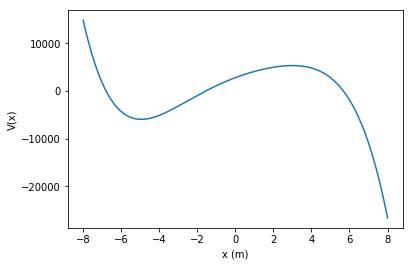

In [10]:
x = np.linspace(-8,8,200)

def cart_V(x):
    return -x**5 + x**4 - 200*x**2 + 1500*x + 2800

y = cart_V(x)
plt.plot(x,y)
plt.xlabel('x (m)')
plt.ylabel('V(x)')

The track slopes up on the left-hand side, so the initial potential increases sharply if we start the cart at more negative $x$.  On the right, the potential slopes down sharply.  The track ends at $x=+8$ meters, at which point the cart falls off (this is a very exciting ride.)

Instead of looking at the detailed motion of the cart on the track, we can use __conservation of energy__ to ask about properties of its _overall_ path.  In particular, consider the total energy

\\[
E = T(x) + V(x).
\\]

Since we know $V(x)$ in full, we can compute the kinetic energy vs. position $T(x)$ for the cart once we know $E$.  But kinetic energy has an important restriction that $V(x)$ does not:  __kinetic energy can never be negative__!  In other words, if $T(x)$ _would_ be negative for any $x$, then that point is _not reachable_ by a cart with that much energy.  (Such a region is said to be "classically forbidden".)

### Part A (8 points)

__Implement the function__ `cart_makes_it_to_end()` below, which considers the motion of a cart _starting from rest_ (so $T(x_0) = 0$) at position `x0`, returning `True` if the cart will make it all the way to $x=+8$ m, and `False` otherwise.  

Remember, we don't have to worry about the _details_ of the motion: all you need to answer is whether the cart's total energy $E$ is large enough that $T(x)$ will always be positive between $x_0$ and the end of the track at $x = +8$ m.

_(Hint: the `np.any()` or `np.all()` functions let you test conditions on a whole array like T(x).)_



In [48]:
def cart_makes_it_to_end(x0, xend, V, num_points=1000):
    """
    Given the 1-d potential V(x), determines whether a cart
    starting from rest at position x=x0 will make it to the
    right end of the track.
    
    
    Arguments:
    ----
    x0: x-position where cart begins from rest.
    xend: x-position where the track ends.
    V: potential energy function V(x) to test
    
    num_points: number of x-points to test in the range (x0,xend) [default: 1000.]

    
    Returns:
    ----
    `True` if the cart can get to xend, `False` otherwise.
    
    """
    
    ## YOUR CODE HERE
    x = np.linspace(x0,xend,1000)
    T = cart_V(x0) - np.max(V(x))
        
    if T >= 0:
        return True
    else:
        return False
    


In [47]:
# Simple tests from plot above:

# Cart obviously won't make it if we start near the local minimum, at x=-6!
print(cart_makes_it_to_end(-6, 8, cart_V))
assert not cart_makes_it_to_end(-6, 8, cart_V)

# Cart WILL make it if we start at x=-8.
print(cart_makes_it_to_end(-8, 8, cart_V))
assert cart_makes_it_to_end(-8, 8, cart_V)

False
True


In [17]:
# Hidden testing cell - do not delete!


### Part B (6 points)

For any situation where the cart _doesn't_ have enough total energy to reach the right end of the track starting from rest, we could just give the cart some initial speed $v_0$ to increase $E$ until it will make it.  

How much initial speed do we need?  If we compute the quantity

$$
T(x) = E - V(x)
$$

and find it to be negative somewhere, then the _most negative value of $T(x)$_ is exactly how much we need to boost the inital kinetic energy $T_0$ by in order to make $T(x) > 0$ everywhere. 

__Implement the function `cart_speed_needed()`__, which returns the minimum initial speed $v_0$ that will allow a cart with mass $m = 1$ kg to reach the end of the track.  If the cart would make it to the end starting from rest, your function should return 0.

_(Hint: now you need the lowest value of $T(x)$ to know how much initial kinetic energy needs to be added.  The `np.min()` function will help you find the lowest value in an entire array.)_

In [53]:
def cart_speed_needed(x0, xend, V, num_points=1000, mass=1):
    """
    Given the 1-d potential V(x), determines the minimum speed v0
    a cart starting at position x=x0 will need to make it to the
    right end of the track.
    
    
    Arguments:
    ----
    x0: x-position where cart begins.
    xend: x-position where the track ends.
    V: potential energy function V(x) to test.
    
    num_points: number of x-points to test in the range (x0,xend) [default: 1000.]
    mass: mass of the cart in kg [default: 1.]
    
    Returns:
    ----
    v0: initial speed (in m/s) above which the cart 
        will make it all the way from x0 to xend.    
    """

    ## YOUR CODE HERE
    x = np.linspace(x0,xend,1000)
    T = np.min(cart_V(x0) - np.any(cart_V(x)))
    if T >= 0:
        return 0
    else:
        return (2*abs(T))**0.5


In [54]:
# For a case where the cart makes it, should get zero.
print(cart_speed_needed(-8, 8, cart_V))
assert cart_speed_needed(-8, 8, cart_V) == 0.0

# Now a case where it's non-zero.  
# Expected answer, computed by hand: v0 ~ 139.0 m/s
print(cart_speed_needed(-6, 8, cart_V))
assert (cart_speed_needed(-6, 8, cart_V) - 139.0) <= 1e-1

0
93.04837451562494


In [ ]:
# Hidden testing cell - do not delete!


### Part C (4 points)

Since we went to the trouble of implementing this for an arbitrary potential $V(x)$, __design your own potential function `my_V(x)`__ corresponding to a track of the same length (so `-8 <= x <= 8`) that will satisfy the following conditions:

* A cart starting at `x=-8` __will not__ make it to the other end at `x=+8`.
* A cart starting at `x=0` __will__ make it to the other end at `x=+8`.
* A cart starting at `x=+4` __will not__ make it to the other end at `x=+8`.

__Write your own tests below__ to make sure your function satisfies all these conditions!  (Making a plot of your $V(x)$ is probably a good idea while you're designing it, too.)

_(Hint: a good way to make a polynomial with a fairly controlled shape is to build it up from the locations of its zeroes, i.e. `f(x) = (x-a)(x+b)(x-c)...`, so you know it will cross zero at `+a`, `-b`, and `+c`. You'll have to play around to get exactly the function you want, though.)_

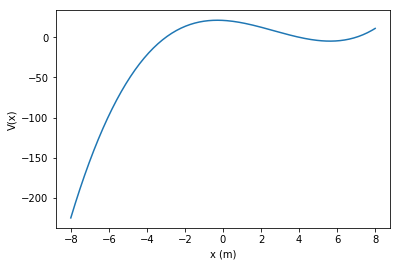

In [84]:
def my_V(x):
    ## YOUR CODE HERE
    return 0.25*(x+3)*(x-4)*(x-7)
x = np.linspace(-8,8,200)
y = my_V(x)
plt.plot(x,y)
plt.xlabel('x (m)')
plt.ylabel('V(x)')



def cart_makes_it_to_end2(x0, xend, V, num_points=1000):
    
    
    ## YOUR CODE HERE
    x = np.linspace(x0,xend,1000)
    T = cart_V(x0) - np.any(my_V(x))
        
    if T >= 0:
        return True
    else:
        return False
    


In [85]:
# Write your own tests here

## YOUR CODE HERE
print(cart_makes_it_to_end2(-8, 8, my_V))
assert not cart_makes_it_to_end2(-6, 8, my_V)

print(cart_makes_it_to_end2(0, 8, my_V))
assert cart_makes_it_to_end2(0, 8, my_V)


print(cart_makes_it_to_end2(4, 8, my_V))
assert not(cart_makes_it_to_end2(4, 8, my_V)

SyntaxError: unexpected EOF while parsing (<ipython-input-85-a1c6c9d0b3f0>, line 12)

In [ ]:
# Hidden tests - do not delete!
## IMPORTANT: make sure your function is called "my_V",
## or you will lose points here!


## 5.2 - Ballistics, masks, and bouncing balls (20 points)

There are some interesting problems that we can now solve (and visualize) with the help of the computer, even in something as simple as one-dimensional motion under gravity.  For a projectile moving vertically with initial height $y_0$ and speed $v_0$, its motion as a function of time will be described by the equation

\\[
y(t) = y_0 + v_0 t - \frac{1}{2} gt^2.
\\]

As we've seen, NumPy arrays enable us to work with large sets of structured data easily - so we can compute the _entire trajectory_ $y(t)$ at once as a single array.  We can use this to add in a complication: what happens when our projectile meets the ground?

### Part A (4 points)

To start with, we assume our projectile is a __lump of clay__: if it hits the ground (which we define to be `y=0`), then it will just stick there.

__Implement the function `traj_y_clay(t, v_0, y_0)` below__, which returns the array `y(t)` according to the formula above, computed for the array of `t` values given as input.  Again, as soon as the lump of clay hits the ground at `y=0`, the trajectory from that point should just be `y=0` for any larger `x`!   

_(Hint: you should implement this by computing `y(t)` ignoring the ground, and then using a mask to zero out the trajectory after it hits the ground.)_


In [125]:
g = 9.8 ## m/s^2

def traj_y_clay(t, v_0, y_0=0):
    """
    Computes y(t) for 1-d projectile motion.
    Projectile is a lump of clay, which sticks to the ground
    at y=0 as soon as it hits.
    
    Arguments:
    - t: array of t-values to compute the motion for.
    - v_0: initial speed in the y-direction.
    - y_0: starting height (must be non-negative!)
    
    Returns:
    - y: array containing the trajectory y(t).
    
    """
    
    assert y_0 >= 0
    
    ## YOUR CODE HERE
    y = y_0 + v_0*t - 0.5*g*t**2
    while np.any(y<=0):
        return y == 0
    
    

In [126]:
import numpy.testing as npt

t_test = np.linspace(0,1,5)
y1_test = np.array([0., 0.6938, 0.775, 0.2438, 0.])

print(traj_y_clay(t_test, 4))

npt.assert_allclose(traj_y_clay(t_test, 0), np.zeros(5), rtol=1e-3)
npt.assert_allclose(traj_y_clay(t_test, 4), y1_test, rtol=1e-3)


[ True False False False False]


AssertionError: 
Not equal to tolerance rtol=0.001, atol=0

(mismatch 20.0%)
 x: array([ True, False, False, False, False])
 y: array([0., 0., 0., 0., 0.])

In [ ]:
# Hidden testing cell - do not delete!


### Part B (2 points)

Let's have a closer look at the trajectories with some plots.  First, __plot `traj_y_clay(t)` below__, for $v_0 = 3$ m/s and $t$ over the range 0 to 1 second, and two different values of y_0: `y_0=0` and `y_0=0.8`.

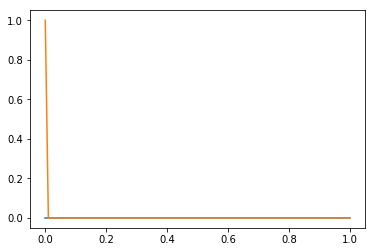

In [118]:
## YOUR CODE HERE

t = np.linspace(0,1,100)
y = traj_y_clay(t,3,y_0=0)
y1 = traj_y_clay(t,3,y_0=0.8)
plt.plot(t, y1)
plt.plot(t, y) 

plt.show()

### Part C (8 points)

Alright, lumps of clay are still pretty boring.  A much more interesting version of this problem is to simulate the motion of a __bouncing ball__, which will fly up into the air again once it hits the ground.  

The simplest way to model a bouncing ball is using the __coefficient of restitution__ $e$, which is equal to the ratio of incoming to outgoing speed when the ball bounces.  For example, a tennis ball with $e = 0.75$ that hits the ground at 4 m/s will bounce back up with a speed of 3 m/s - after which it obeys the same simple equation of motion as above.

__Implement a new function `bounce_y(t, v_0, e)`__ that will produce the trajectory of a bouncing ball.

<i>(Hint: the art of this solution is all in finding a good algorithm!  My suggestion is the following, which is nicely adapted to a `while` loop:)

* Start by calculating the full $y(t)$ without bouncing, letting $y$ go negative.
* Now, look for where the current trajectory $y$ is negative: that entire part of the trajectory should be replaced by a new trajectory that starts with a bounce.
* The starting speed of the bounce is equal to the _ending_ speed of the previous trajectory, times the coefficient of restitution $e$.  You could calculate $v(t)$, but there's a very simple relation between the initial and final speeds due to energy conservation - remember, energy is still conserved in between bounces!  __Don't forget to include $y_0$ in your conservation of energy calculation...__ you should sketch this out on paper first.
* Repeat the steps above until there are no negative $y$ values left.

The `np.any()` function will definitely come in handy for your `while` loop.  For replacing only the negative part of `y`, you'll need a mask - and remember, when assigning to a mask of an array `a[mask] = b`, the array `b` had better be the same length as `a[mask]`...)


In [129]:
g = 9.8  ## m/s^2

def traj_y_bounce(t, v_0, y_0=0, e=0.75):
    """
    Computes y(t) for 1-d projectile motion.
    Projectile is a bouncing ball, with coefficient of
    restitution e.
    
    The ground is taken to be at y=0.
        
    Arguments:
    - t: array of t-values to compute the motion for.
    - v_0: initial speed in the y-direction.
    - y_0: starting height (must be non-negative!) [default: 0.]
    - e: coefficient of restitution [default: 0.75.]
    
    Returns:
    - y: array containing the trajectory y(t).
    
    """

    ## YOUR CODE HERE
    y = y_0 + v_0*t - 0.5*g*t**2
    while (y<=0):
        abs(e*np.min(y)) = v_0
        y = y_0 + v_0*t - 0.5*g*t**2



SyntaxError: can't assign to function call (<ipython-input-129-db450965e6a4>, line 25)

In [130]:
import numpy.testing as npt

# Simple tests
t_test = np.linspace(0,1,200)

## If v_0 is high enough, it won't bounce, so we get the same answer as for clay
npt.assert_allclose(traj_y_bounce(t_test, 10, y_0=0.0, e=0.75), traj_y_clay(t_test, 10, y_0=0.0))

## Testing known solution with a single bounce
t_short_test = np.linspace(0,1,10)

known_traj = np.array(
    [0.        , 0.32839506, 0.53580247, 0.62222222, 0.58765432,
     0.43209877, 0.15555556, 0.        , 0.23117284, 0.34135802]
)

print(traj_y_bounce(t_short_test, 3.5, y_0=0.0, e=0.75))

npt.assert_allclose(traj_y_bounce(t_short_test, 3.5, y_0=0.0, e=0.75), known_traj)


NameError: name 'traj_y_bounce' is not defined

In [ ]:
# More challenging tests, for common mistakes.
# If you fail this cell, ask yourself these questions:
## What does your function do if y_0 is positive?  Plot it - does it look right?
## What does your function do if v_0 is negative?  Plot it - does it look right?
# Remember, right after a bounce the trajectory you find starts at the ground (y=0),
# and it definitely starts with v pointing up.

t_short_test_2 = np.linspace(0,1,20)

known_traj_2bounce = np.array(
      [0.        , 0.11800554, 0.20886427, 0.27257618, 0.30914127,
       0.31855956, 0.30083102, 0.25595568, 0.18393352, 0.08476454,
       0.        , 0.0851108 , 0.14307479, 0.17389197, 0.17756233,
       0.15408587, 0.1034626 , 0.02569252, 0.        , 0.06043975]
)

known_traj_y0 = np.array(
      [0.4       , 0.62839506, 0.73580247, 0.72222222, 0.58765432,
       0.33209877, 0.        , 0.25792239, 0.39485713, 0.41080421]
)

known_traj_v0_negative = np.array(
    [0.5       , 0.        , 0.43110221, 0.74121677, 0.93034368,
       0.99848293, 0.94563452, 0.77179846, 0.47697475, 0.06116338]
)


print(traj_y_bounce(t_short_test_2, 2.5, y_0=0.0, e=0.75))

print(traj_y_bounce(t_short_test, 2.6, y_0=0.4, e=0.75))


npt.assert_allclose(traj_y_bounce(t_short_test_2, 2.5, y_0=0.0, e=0.75), known_traj_2bounce)

npt.assert_allclose(traj_y_bounce(t_short_test, 2.6, y_0=0.4, e=0.75), known_traj_y0)

npt.assert_allclose(traj_y_bounce(t_short_test, -5, y_0=0.5, e=0.75), known_traj_v0_negative)

In [ ]:
# Hidden testing cell - do not delete!



### Part D (4 points)

Using your new function, make two plots below:

i. Plot the trajectories for a tennis ball (e=0.75) vs. a basketball (e=0.88), for t from 0 to 2 seconds, with $v_0 = 4$ m/s and $y_0 = 0$.  __Use a legend__ to show which trajectory is which!


In [ ]:
## YOUR CODE HERE


ii. Plot the trajectories for two tennis balls (e=0.75), both starting from an initial height `y_0 = 0.5` m, but one is thrown up at $v_0 = 4$ m/s, and the other is thrown _downwards_ with $v_0 = -8$ m/s.

In [ ]:
## YOUR CODE HERE
